In [194]:
import pandas as pd
import numpy as np

In [195]:
df = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 29 & 30 TimeSeries\Train.csv")

In [196]:
del df['ID']
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  18288 non-null  object
 1   Count     18288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 285.9+ KB


In [198]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean()  # reduce rows
# df.drop(['ID'], axis = 1,inplace=True)

C:\Users\GOD'SF~1\AppData\Local\Temp/ipykernel_7656/3706016313.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')


In [199]:
# df.set_index('Datetime', inplace=True)

In [200]:
df['SMA_2'] = df.Count.rolling(2, min_periods=1).mean()
df['SMA_12'] = df.Count.rolling(12, min_periods=6).mean()
df.head(20)

,Count,SMA_2,SMA_12
Datetime,,,
2012-08-25,3.166667,3.166667,NaN
2012-08-26,3.666667,3.416667,NaN
2012-08-27,2.583333,3.125000,NaN
2012-08-28,2.416667,2.500000,NaN
2012-08-29,2.500000,2.458333,NaN
2012-08-30,3.083333,2.791667,2.902778
2012-08-31,3.250000,3.166667,2.952381
2012-09-01,4.666667,3.958333,3.166667
2012-09-02,4.916667,4.791667,3.361111


<AxesSubplot:xlabel='Datetime'>

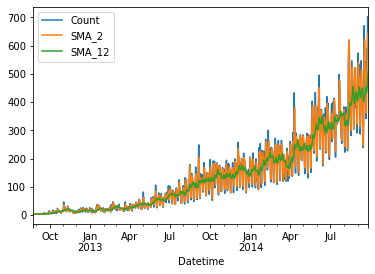

In [201]:
df.plot()

In [202]:
# EMA Sales
df1 = pd.DataFrame()
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
df['EMA_0.1'] = df.Count.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df['EMA_0.3'] = df.Count.ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Datetime'>

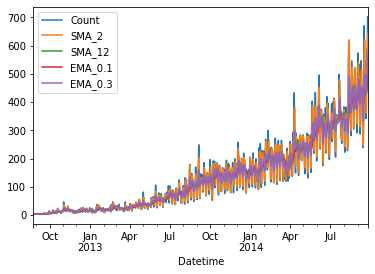

In [203]:
df.plot()

In [204]:
# import matplotlib.pyplot as plt
# rolmean = df.Count.rolling(window=12).mean()

# rolstd = df.Count.rolling(window=12).std()

# orig = plt.plot(df.Count,color='blue',label='original')

# mean = plt.plot(rolmean,color='red',label='Rolling Mean')

# std = plt.plot(rolstd,color='black',label='Rolling std')

# plt.legend()

# plt.title('Rolling mean and Std deviation')

# plt.show()



In [205]:
from statsmodels.tsa.stattools import adfuller


In [206]:
# df.isna().value_counts()

In [207]:
test_result=adfuller(df['Count'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\

(2.986350959013852,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584322)

In [208]:
def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [209]:
adfuller_test(df['Count'])

ADF Test Statistic : 2.986350959013852
p-value : 1.0
Lags Used : 20
Number of Observations Used : 741
weak evidence against null hypothesis, indicating it is non-stationary 


In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [211]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(df.Count,model='additive',period=1)


In [212]:
import  matplotlib.pyplot as plt
# plt.show()

In [213]:
# Detrending
df_detrend =  (df['Count'] - df['Count'].rolling(window=12).mean())/df['Count'].rolling(window=46).std()

In [214]:
# S_df= df['Seasonal_Difference']
n_df = pd.DataFrame(df['Count'].T)
n_df.dropna(inplace=True)
n_df.shape

(762, 1)

In [215]:
y_to_train = n_df.iloc[:600] # dataset to train
y_to_val = n_df.iloc[600:] # last X months for test
predict_date = len(n_df) - len(n_df.iloc[:75])



In [216]:
y_to_val

,Count
Datetime,
2014-04-17,257.583333
2014-04-18,247.000000
2014-04-19,158.250000
2014-04-20,140.583333
2014-04-21,223.333333
...,...
2014-09-21,379.250000
2014-09-22,588.166667
2014-09-23,554.333333


In [217]:
from statsmodels.tsa.api import SimpleExpSmoothing


0.1021280059427671


<function matplotlib.pyplot.show(close=None, block=None)>

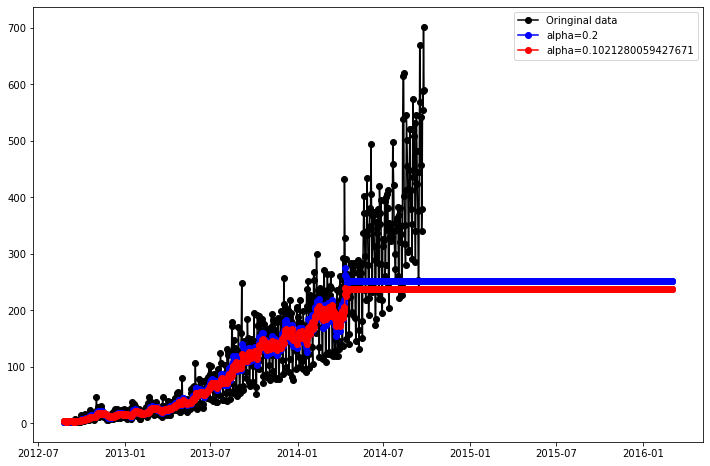

In [218]:
fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)
 
fit2 = SimpleExpSmoothing(y_to_train).fit() 
#statsmodels to automatically find an optimized alpha value for us.
fcast2 = fit2.forecast(predict_date)
 
alpha = fit2.params["smoothing_level"]
print(alpha)
 
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='alpha=0.2')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha}')
 
plt.legend()
plt.show

In [219]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

699410.4850384595
683326.7805020371


In [220]:
from statsmodels.tsa.api import Holt

0.061858278271999675
0.00018608396554748328


<function matplotlib.pyplot.show(close=None, block=None)>

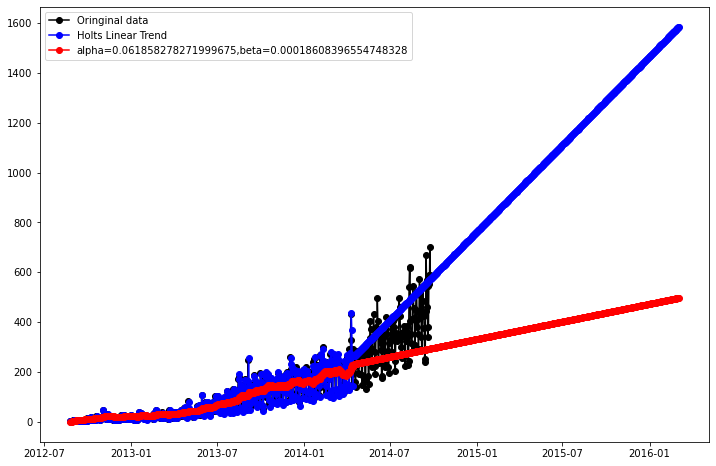

In [221]:
fit1 = Holt(y_to_train).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)
 
fit2 = Holt(y_to_train).fit()
fcast2 = fit2.forecast(predict_date)


alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_trend"]
print(beta)            


plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')
 
plt.legend()
plt.show

In [222]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

936009.625865363
670561.7363438432


In [223]:
from statsmodels.tsa.api import ExponentialSmoothing

<function matplotlib.pyplot.show(close=None, block=None)>

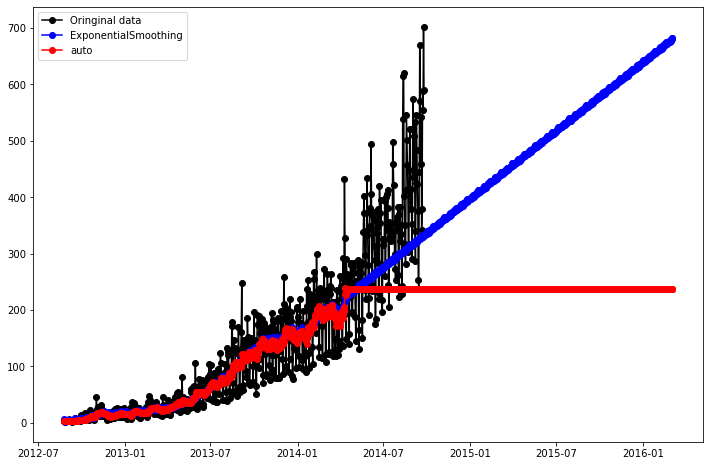

In [224]:
fit1 = ExponentialSmoothing(y_to_train,seasonal_periods = 12, trend='add', seasonal='add').fit()
fcast1 = fit1.forecast(predict_date)
 
fit2 = ExponentialSmoothing(y_to_train).fit()  # use_boxcox=True
fcast2 = fit2.forecast(predict_date)            

plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')
 
plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='ExponentialSmoothing')
 
plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label='auto')
 
plt.legend()
plt.show

In [225]:
#square sum error
sse1 =fit1.sse
sse2= fit2.sse
print(sse1)
print(sse2)

671631.8615754868
683326.7804999587
